In [36]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)
# Combine the data into a single dataset
city_ride_df = pd.merge(ride_data_df, city_data_df, on='city', how='left')
city_ride_df.head()
# Display the data table for preview

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [37]:
avg_city = city_ride_df.groupby("city")
avg_fare = avg_city.mean()["fare"]
number_rides = avg_city["ride_id"].count()
driver_count = avg_city.mean()["driver_count"]
city_type = city_data_df.set_index("city")["type"]

infoset = pd.DataFrame({"Total Rides Per City": number_rides,
                        "Average Fare Per City": avg_fare,
                        "Driver Count": driver_count,
                        "City Type": city_type})

infoset.head()

,Total Rides Per City,Average Fare Per City,Driver Count,City Type
Amandaburgh,18,24.641667,12.0,Urban
Barajasview,22,25.332273,26.0,Urban
Barronchester,16,36.422500,11.0,Suburban
Bethanyland,18,32.956111,22.0,Suburban
Bradshawfurt,10,40.064000,7.0,Rural


## Bubble Plot of Ride Sharing Data

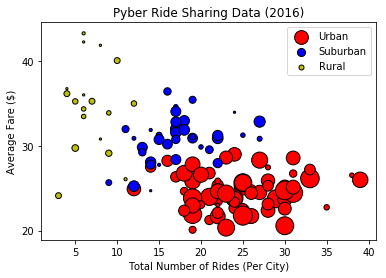

In [38]:
# Obtain the x and y coordinates for each of the three city types
urban_df = infoset.loc[infoset["City Type"] == "Urban",:]
urban_x = urban_df["Total Rides Per City"]
urban_y = urban_df["Average Fare Per City"]
urban_s = urban_df["Driver Count"]
urban = plt.scatter(urban_x, urban_y, marker="o", facecolors="r", edgecolors="black", s=(urban_s*5), label="Urban")

suburban_df = infoset.loc[infoset["City Type"] == "Suburban",:]
suburban_x = suburban_df["Total Rides Per City"]
suburban_y = suburban_df["Average Fare Per City"]
suburban_s = suburban_df["Driver Count"]
suburban = plt.scatter(suburban_x, suburban_y, marker="o", facecolors="b", edgecolors="black", s=(suburban_s*5), label="Suburban")

rural_df = infoset.loc[infoset["City Type"] == "Rural",:]
rural_x = rural_df["Total Rides Per City"]
rural_y = rural_df["Average Fare Per City"]
rural_s = rural_df["Driver Count"]
rural = plt.scatter(rural_x, rural_y, marker="o", facecolors="y", edgecolors="black", s=(rural_s*5), label="Rural")

plt.xlabel("Total Number of Rides (Per City)")    
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.yticks((40, 30, 20))
plt.legend()
plt.savefig("Pyber.png")


In [39]:
# Show plot
plt.show()

## Total Fares by City Type

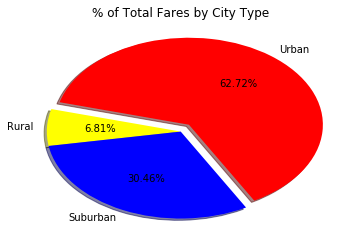

In [58]:
# Calculate Type Percents
total_fares = city_ride_df.groupby(["type"])["fare"].sum()

# Build Pie Chart
labels = total_fares.index
colors = ["yellow", "blue", "red"]
explode = (0,0,0.1)

plt.pie(total_fares, explode=explode, labels=labels, colors=colors, autopct="%1.2f%%", shadow=True, startangle=165)
plt.title("% of Total Fares by City Type")
plt.savefig("TotalFaresbyCityType.png")

# Save Figure


In [59]:
# Show Figure
plt.show()

## Total Rides by City Type

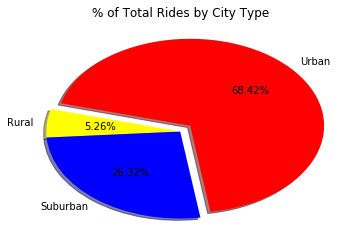

In [65]:
total_rides = city_ride_df.groupby(["type"])["ride_id"].count()

# Build Pie Chart
labels = total_rides.index
colors = ["yellow", "blue", "red"]
explode = (0,0,0.1)

plt.pie(total_rides, explode=explode, labels=labels, colors=colors, autopct="%1.2f%%", shadow=True, startangle=165)
plt.title("% of Total Rides by City Type")
plt.savefig("TotalRidesbyCityType.png")


In [66]:
# Show Figure
plt.show()

## Total Drivers by City Type

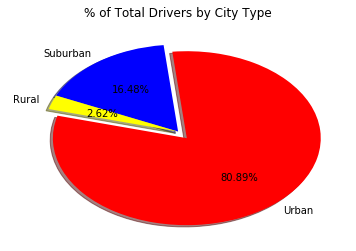

In [88]:
urban_drivers = urban_df["Driver Count"].sum()
suburban_drivers = suburban_df["Driver Count"].sum()
rural_drivers = rural_df["Driver Count"].sum()

driver_by_type = [urban_drivers],[suburban_drivers],[rural_drivers]

# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"]
colors = ["red", "blue", "yellow"]
explode = (0.1,0,0)

plt.pie(driver_by_type, explode=explode, labels=labels, colors=colors, autopct="%1.2f%%", shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")
plt.savefig("TotalDriversbyCityType.png")


In [85]:
# Show Figure
plt.show()